## Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the <code>confusion matrix</code>.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe  

Data for the machine learning model is loaded from IBM Cloud in order to eliminate mistakes while obtaining the data.

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>

In [5]:
Y = data['Class'].to_numpy()
print(type(Y))
print('Shape Y :', Y.shape)
Y[:10]

<class 'numpy.ndarray'>
Shape Y : (90,)


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

## TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code>.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

## TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

We can see we only have 18 test samples.

In [8]:
Y_test.shape

(18,)

## TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [9]:
# Defining the hyperparameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Defining the Logistic Regression Model
lr = LogisticRegression()

# Defining the GridSearchCV Object
grid_search_lr = GridSearchCV(estimator = lr ,
                              param_grid = parameters,
                              cv = 10,
                              scoring = 'accuracy')

# Execute
logreg_cv = grid_search_lr.fit(X_train, Y_train)

In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:

In [11]:
print('Model Score on Testset : {:.3f}'.format(logreg_cv.score(X_test, Y_test)))

Model Score on Testset : 0.833


Lets look at the confusion matrix:

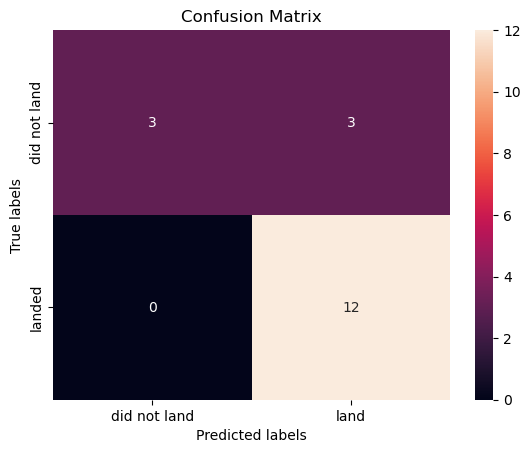

In [12]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

## TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [13]:
# Defining the hyperparameters
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Defining the Support Vector Machine Model
svm = SVC()

# Defining the GridSearchCV Object
grid_search_svm = GridSearchCV(estimator = svm ,
                               param_grid = parameters,
                               cv = 10,
                               scoring = 'accuracy')

# Execute
svm_cv = grid_search_svm.fit(X_train, Y_train)

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:

In [15]:
print('Model Score on Testset : {:.3f}'.format(svm_cv.score(X_test, Y_test)))

Model Score on Testset : 0.833


Lets look at the confusion matrix:

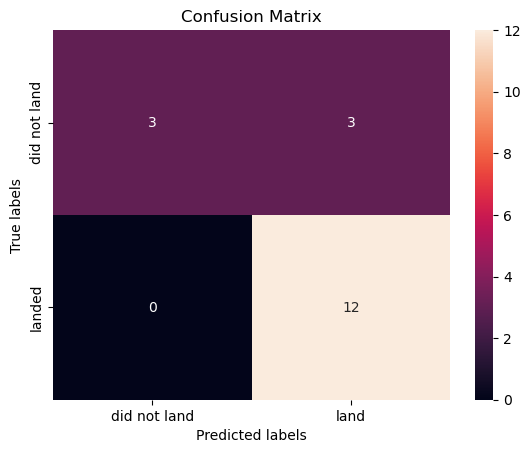

In [16]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

'auto' is removed from 'max_features' since it is deprecated.

In [17]:
# Defining the hyperparameters
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Defining the Decision Tree Model
tree = DecisionTreeClassifier()

# Defining the GridSearchCV Object
grid_search_tree = GridSearchCV(estimator = tree ,
                                param_grid = parameters,
                                cv = 10,
                                scoring = 'accuracy')

# Execute
tree_cv = grid_search_tree.fit(X_train, Y_train)

In [18]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8714285714285713


## TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [19]:
print('Model Score on Testset : {:.3f}'.format(tree_cv.score(X_test, Y_test)))

Model Score on Testset : 0.833


We can plot the confusion matrix 

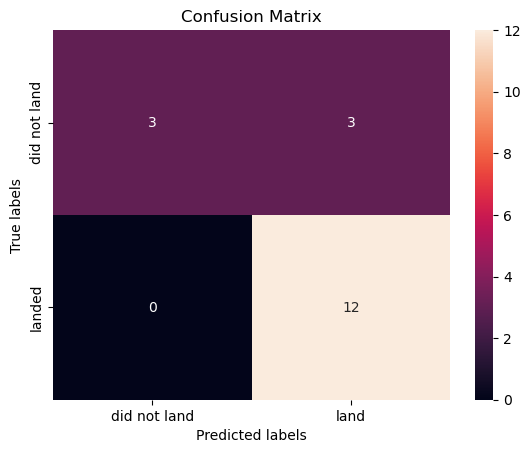

In [20]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [21]:
# Defining the hyperparameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Defining the Decision Tree Model
KNN = KNeighborsClassifier()

# Defining the GridSearchCV Object
grid_search_knn = GridSearchCV(estimator = KNN ,
                                param_grid = parameters,
                                cv = 10,
                                scoring = 'accuracy')

# Execute
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [22]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [23]:
print('Model Score on Testset : {:.3f}'.format(knn_cv.score(X_test, Y_test)))

Model Score on Testset : 0.833


We can plot the confusion matrix 

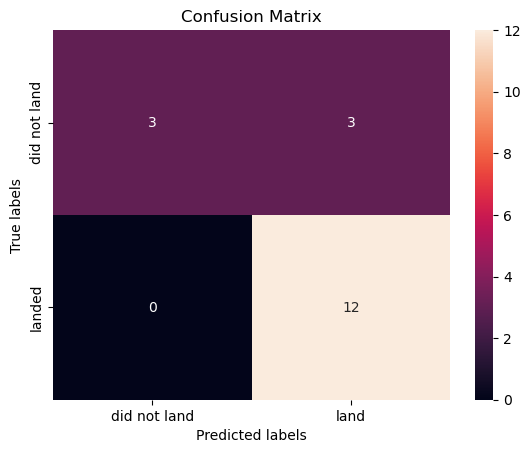

In [24]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  12

Find the method performs best:

In [25]:
model_scores = {'Logistic Regression': logreg_cv.best_score_,
                'Support Vector Machine': svm_cv.best_score_,
                'Decision Tree Classifier': tree_cv.best_score_,
                'KNN': knn_cv.best_score_}

best_algorithm = max(model_scores, key = model_scores.get)
best_algorithm

'Decision Tree Classifier'

In [26]:
print('Best model is :', best_algorithm, 'with the score of :', tree_cv.best_score_)
print('Best parameters are :', tree_cv.best_params_)

Best model is : Decision Tree Classifier with the score of : 0.8714285714285713
Best parameters are : {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


# Bar Chart for Model Accuracies

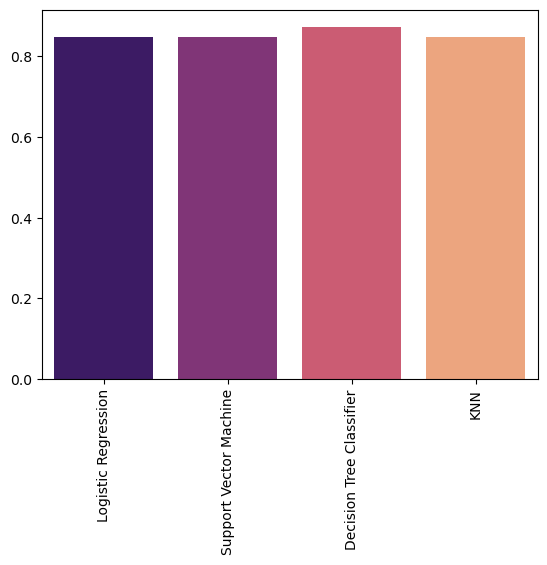

In [27]:
model_keys = [*model_scores.keys()]
model_values = [*model_scores.values()]

barplot = sns.barplot(x = model_keys, y = model_values, palette = 'magma')
barplot.tick_params(axis = 'x', rotation = 90)